# Chapter 21: Numerical Integration (Continued)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz
from scipy.integrate import cumtrapz
from scipy.integrate import quad

## 21.4: Simpson's Rule



Consider two consecutive subintervals. Simpson's rule approximates the are under $f(x)$ over these two sub-intervals by fitting a uadratic polynomial through the point $(x_{i-1},f(x_{i-1})),(x_i,f(x_i))$ and $(x_{i+1},f(x_{i+1}))$, and then integrating the quadratic exactly.

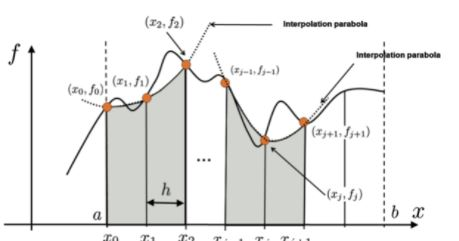

First we construct the quadratic polynomial approximation of the function over the two sub-intervals. The easiest way to do thsi is to use Lagrange polynomials:

$$P_i(x)=f(x_{i-1})\frac{(x-x_i)(x-x_{i+1})}{(x_{i-1}-x_i)(x_{i-1}-x_{i+1})}+f(x_i)\frac{(x-x_{i-1})(x-x_{i+1})}{(x_{i}-x_{i-1})(x_{i}-x_{i+1})}+f(x_{i+1})\frac{(x-x_{i-1})(x-x_{i+1})}{(x_{i+1}-x_{i-1})(x_{i+1}-x_{i})}$$

This leads to $$\int_a^b f(x)dx \approx \frac{h}{3} \left[ f(x_0)+4 \left( \sum_{i=1,i odd}^{n-1} f(x_i)\right) + 2\left(\sum_{i=2,i even}^{n-2} f(x_i)\right) + f(x_n)\right]$$

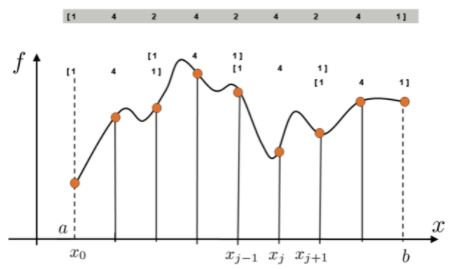

Note that to use Simpson's rule, you need an even number of intervals, and therefore an odd number of grid points.

In [3]:
a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) \
            + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = 2 - I_simp

print(I_simp)
print(err_simp)

2.0001095173150043
-0.00010951731500430384


##21.5: Computing Integral in Python

The `scipy.integrate` sub-package has several functions for computing integrals. The `trapz` function takes input argument array of function values $f$ computed on a numerical grid $x$.

In [16]:
a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trapz = trapz(f,x)
I_trap = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])

print(f" The value using the trapz function is {I_trapz}.")
print(f"The value using the trapezoid rule is {I_trap}.")

 The value using the trapz function is 1.9835235375094544.
The value using the trapezoid rule is 1.9835235375094546.


Sometimes we want to know the approximated cumulative integral. In other words, we want to know $F(X)=\int_{x_0}^X f(x)dx$. For this purpose we use the `cumtrapz` function `cumsum`.

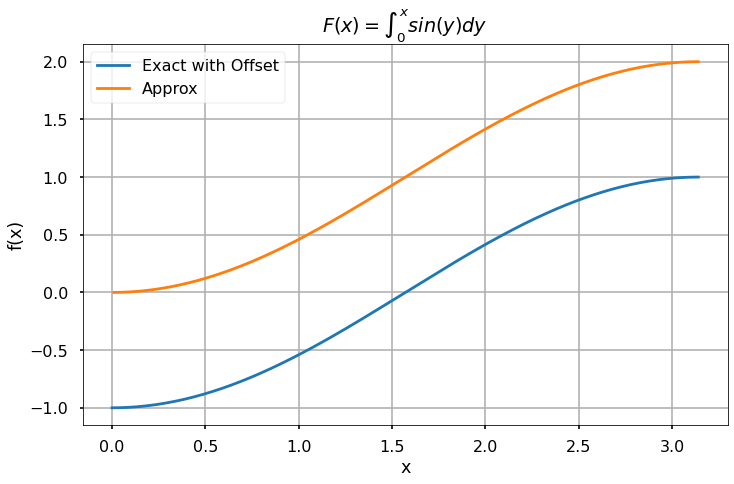

In [11]:
plt.style.use('seaborn-poster')

x = np.arange(0, np.pi, 0.01)
F_exact = -np.cos(x)
F_approx = cumtrapz(np.sin(x), x)

plt.figure(figsize = (10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$F(x) = \int_0^{x} sin(y) dy$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset', 'Approx'])
plt.show()

The `quad` function uses a different numerical differentiation scheme to approximate integrals. `quad` integrates the function defined by the function object $f$, from $a$ to $b$.

We will use `quad` to compute $\int_0^\pi sin(x)dx$.

In [15]:
I_quad, est_err_quad = \
          quad(np.sin, 0, np.pi)
print(f"The integral using quad is {I_quad}.")
err_quad = 2 - I_quad
print(f"The estimated error of quad is {est_err_quad}, and the actual error is {err_quad}.")

The integral using quad is 2.0.
The estimated error of quad is 2.220446049250313e-14, and the actual error is 0.0.
